In [1]:
import torch
from torch import optim
import torch.nn as nn
import torch.nn.functional as F
import torch.autograd as autograd
from torch.autograd import Variable

from sklearn.preprocessing import OneHotEncoder
import os, math, glob, argparse
from utils.torch_utils import *
from utils.utils import *
from apa_predictor_pytorch import *
import matplotlib.pyplot as plt
import utils.language_helpers
plt.switch_backend('agg')
import numpy as np
from models import *

from wgan_gp_apa_analyzer import *


/home/ubuntu/anaconda3/envs/pytorch_p36_fbgan/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:

run_names = [
    'apa_simple_sample',
    'apa_simple_strong',
    'fbgan_apa_simple_sample',
    'fbgan_apa_simple_sample',
    'fbgan_apa_simple_sample',
    'fbgan_apa_simple_sample_median_cutoff',
    'fbgan_apa_simple_sample_median_cutoff',
    'fbgan_apa_simple_sample_median_cutoff'
]

iterations = [
    None,
    None,
    50,
    100,
    None,
    50,
    100,
    None
]

sampling_factors = [
    1,
    10
]

n_seqs = 4096

file_suffix = '_4094_sequences'

for sampling_factor in sampling_factors :
    print("Sampling factor = " + str(sampling_factor))
    
    n_seqs_upsampled = n_seqs * sampling_factor
    
    for run_name, run_iter in zip(run_names, iterations) :
        model = WGAN_LangGP(run_name=run_name)
        model.load_model(directory = './checkpoint/' + run_name + '/', iteration=run_iter)

        num_batches_sample = int(n_seqs_upsampled / model.batch_size)

        print("Starting sampling...")

        seqs = model.sample(num_batches_sample, 1)

        print("Finished sampling.")

        if sampling_factor > 1 :
            preds = np.ravel(model.analyzer.predict_model(seqs))
            sort_index = np.argsort(preds)[::-1]
            
            seqs = [seqs[sort_index[k]] for k in range(len(seqs))][:n_seqs]
        
        #Save sequences to file
        with open(run_name + "_iter_" + str(run_iter) + file_suffix + "_sampling_factor_" + str(sampling_factor) + ".txt", "wt") as f :
            for i in range(len(seqs)) :
                seq = seqs[i]

                f.write(seq + "\n")



Sampling factor = 1
loading dataset...
('T', 'C', 'C', 'C', 'T', 'A', 'C', 'A', 'C', 'G', 'A', 'C', 'G', 'C', 'T', 'C', 'T', 'T', 'C', 'C', 'G', 'A', 'T', 'C', 'T', 'C', 'C', 'C', 'A', 'C', 'C', 'G', 'A', 'C', 'T', 'T', 'G', 'T', 'A', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'A', 'T', 'A', 'T', 'A', 'G', 'C', 'C', 'T', 'G', 'A', 'T', 'T', 'A', 'G', 'T', 'T', 'A', 'T', 'G', 'T', 'T', 'T', 'A', 'A', 'A', 'T', 'A', 'A', 'A', 'A', 'T', 'T', 'A', 'T', 'T', 'A', 'A', 'T', 'G', 'G', 'T', 'A', 'A', 'C', 'T', 'T', 'C', 'T', 'G', 'T', 'A', 'C', 'C', 'T', 'A', 'T', 'T', 'T', 'T', 'A', 'C', 'G', 'A', 'T', 'C', 'A', 'T', 'C', 'A', 'G', 'T', 'T', 'C', 'A', 'A', 'T', 'T', 'A', 'A', 'A', 'A', 'C', 'A', 'C', 'C', 'G', 'T', 'G', 'C', 'A', 'A', 'G', 'C', 'C', 'T', 'C', 'C', 'T', 'T', 'C', 'G', 'A', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'A', 'G', 'G', 'G', 'T', 'C', 'A', 'T', 'A', 'C', 'G', 'C', 'G', 'G', 'C', 'C', 'C', 'G', 'C', 'C', 'T', 'A', 'A', 'C', 'C', 'C', 'T', 'A', 'A', 'G', 'C', 'A', 'G', 'A', 'T', 'T', 

Finished sampling.
loading dataset...
('T', 'C', 'C', 'C', 'T', 'A', 'C', 'A', 'C', 'G', 'A', 'C', 'G', 'C', 'T', 'C', 'T', 'T', 'C', 'C', 'G', 'A', 'T', 'C', 'T', 'T', 'A', 'C', 'A', 'T', 'A', 'G', 'T', 'T', 'T', 'C', 'G', 'A', 'T', 'G', 'C', 'T', 'T', 'T', 'T', 'T', 'A', 'T', 'T', 'G', 'G', 'T', 'A', 'G', 'C', 'T', 'C', 'T', 'A', 'T', 'T', 'T', 'A', 'C', 'T', 'G', 'T', 'A', 'C', 'T', 'A', 'T', 'T', 'A', 'A', 'A', 'A', 'A', 'G', 'G', 'G', 'A', 'T', 'A', 'A', 'G', 'T', 'G', 'A', 'T', 'T', 'G', 'A', 'C', 'A', 'A', 'G', 'G', 'A', 'G', 'G', 'T', 'T', 'T', 'G', 'T', 'C', 'C', 'C', 'G', 'G', 'G', 'A', 'A', 'G', 'G', 'G', 'T', 'T', 'T', 'A', 'A', 'A', 'T', 'A', 'A', 'A', 'T', 'A', 'A', 'T', 'T', 'T', 'A', 'A', 'G', 'G', 'T', 'G', 'T', 'G', 'T', 'G', 'T', 'C', 'G', 'G', 'C', 'T', 'T', 'G', 'T', 'C', 'G', 'G', 'A', 'T', 'A', 'A', 'G', 'T', 'T', 'C', 'G', 'T', 'C', 'G', 'G', 'T', 'G', 'G', 'T', 'C', 'G', 'C', 'C', 'T', 'A', 'A', 'C', 'C', 'C', 'T', 'A', 'A', 'G', 'C', 'A', 'G', 'A', 'T', 'T', '

Starting sampling...
Finished sampling.
loading dataset...
('T', 'C', 'C', 'C', 'T', 'A', 'C', 'A', 'C', 'G', 'A', 'C', 'G', 'C', 'T', 'C', 'T', 'T', 'C', 'C', 'G', 'A', 'T', 'C', 'T', 'A', 'C', 'T', 'G', 'T', 'A', 'C', 'G', 'T', 'T', 'T', 'G', 'A', 'T', 'C', 'T', 'C', 'T', 'T', 'A', 'G', 'A', 'A', 'G', 'T', 'A', 'T', 'G', 'T', 'T', 'A', 'T', 'C', 'G', 'G', 'T', 'G', 'T', 'G', 'A', 'T', 'T', 'G', 'A', 'T', 'A', 'A', 'T', 'A', 'A', 'A', 'T', 'T', 'C', 'T', 'A', 'T', 'T', 'T', 'A', 'C', 'T', 'C', 'T', 'T', 'G', 'G', 'G', 'A', 'T', 'C', 'C', 'T', 'G', 'T', 'A', 'G', 'A', 'A', 'C', 'T', 'G', 'T', 'G', 'T', 'T', 'G', 'T', 'C', 'T', 'G', 'T', 'G', 'A', 'T', 'T', 'A', 'T', 'T', 'A', 'A', 'A', 'T', 'A', 'C', 'C', 'G', 'C', 'T', 'C', 'C', 'A', 'A', 'T', 'T', 'A', 'A', 'G', 'G', 'T', 'C', 'C', 'A', 'T', 'A', 'G', 'T', 'C', 'T', 'G', 'G', 'C', 'A', 'G', 'G', 'T', 'G', 'G', 'T', 'C', 'T', 'T', 'A', 'A', 'T', 'A', 'A', 'C', 'G', 'C', 'C', 'T', 'A', 'A', 'C', 'C', 'C', 'T', 'A', 'A', 'G', 'C', 'A', 

Starting sampling...
Finished sampling.
loading dataset...
('T', 'C', 'C', 'C', 'T', 'A', 'C', 'A', 'C', 'G', 'A', 'C', 'G', 'C', 'T', 'C', 'T', 'T', 'C', 'C', 'G', 'A', 'T', 'C', 'T', 'A', 'A', 'A', 'G', 'T', 'A', 'A', 'C', 'T', 'G', 'A', 'G', 'C', 'C', 'T', 'T', 'G', 'T', 'G', 'A', 'C', 'A', 'T', 'T', 'A', 'A', 'A', 'T', 'G', 'T', 'A', 'G', 'G', 'A', 'G', 'C', 'G', 'T', 'T', 'G', 'A', 'G', 'C', 'C', 'G', 'A', 'T', 'T', 'A', 'A', 'A', 'G', 'T', 'G', 'T', 'T', 'A', 'T', 'C', 'G', 'G', 'A', 'T', 'C', 'G', 'C', 'T', 'C', 'A', 'G', 'C', 'A', 'T', 'A', 'A', 'T', 'T', 'C', 'T', 'C', 'G', 'T', 'A', 'T', 'A', 'A', 'T', 'T', 'T', 'G', 'C', 'T', 'C', 'T', 'G', 'T', 'A', 'A', 'T', 'A', 'A', 'A', 'A', 'G', 'T', 'C', 'T', 'C', 'C', 'G', 'T', 'T', 'T', 'G', 'G', 'G', 'G', 'C', 'C', 'G', 'C', 'T', 'A', 'G', 'A', 'G', 'G', 'G', 'C', 'T', 'T', 'A', 'A', 'C', 'G', 'G', 'T', 'G', 'C', 'A', 'T', 'G', 'T', 'G', 'C', 'G', 'T', 'C', 'G', 'C', 'C', 'T', 'A', 'A', 'C', 'C', 'C', 'T', 'A', 'A', 'G', 'C', 'A', 

Starting sampling...
Finished sampling.
Sampling factor = 10
loading dataset...
('T', 'C', 'C', 'C', 'T', 'A', 'C', 'A', 'C', 'G', 'A', 'C', 'G', 'C', 'T', 'C', 'T', 'T', 'C', 'C', 'G', 'A', 'T', 'C', 'T', 'A', 'T', 'C', 'T', 'G', 'A', 'G', 'T', 'G', 'C', 'C', 'T', 'G', 'A', 'G', 'A', 'T', 'A', 'G', 'C', 'T', 'T', 'T', 'T', 'T', 'G', 'T', 'A', 'A', 'A', 'T', 'A', 'T', 'T', 'G', 'G', 'G', 'A', 'T', 'C', 'G', 'T', 'C', 'T', 'G', 'A', 'A', 'T', 'A', 'A', 'A', 'T', 'G', 'G', 'A', 'C', 'T', 'G', 'T', 'A', 'A', 'A', 'A', 'C', 'A', 'A', 'T', 'T', 'G', 'C', 'A', 'A', 'G', 'C', 'T', 'C', 'A', 'G', 'T', 'G', 'T', 'C', 'A', 'T', 'T', 'C', 'G', 'G', 'A', 'T', 'T', 'C', 'T', 'G', 'T', 'A', 'A', 'T', 'T', 'A', 'A', 'A', 'C', 'T', 'A', 'T', 'A', 'T', 'C', 'T', 'C', 'T', 'T', 'T', 'G', 'C', 'C', 'A', 'G', 'T', 'G', 'A', 'C', 'C', 'T', 'G', 'C', 'G', 'A', 'A', 'T', 'A', 'T', 'C', 'C', 'G', 'T', 'G', 'T', 'T', 'A', 'T', 'A', 'T', 'G', 'G', 'G', 'C', 'G', 'C', 'C', 'T', 'A', 'A', 'C', 'C', 'C', 'T', 'A',

/home/ubuntu/anaconda3/envs/pytorch_p36_fbgan/lib/python3.6/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


loading dataset...
('T', 'C', 'C', 'C', 'T', 'A', 'C', 'A', 'C', 'G', 'A', 'C', 'G', 'C', 'T', 'C', 'T', 'T', 'C', 'C', 'G', 'A', 'T', 'C', 'T', 'T', 'A', 'G', 'A', 'C', 'T', 'T', 'T', 'T', 'G', 'A', 'T', 'T', 'A', 'C', 'A', 'T', 'A', 'A', 'C', 'T', 'A', 'G', 'C', 'T', 'G', 'C', 'G', 'T', 'A', 'A', 'G', 'T', 'T', 'T', 'G', 'T', 'T', 'A', 'G', 'A', 'A', 'A', 'G', 'A', 'A', 'T', 'T', 'A', 'A', 'A', 'T', 'G', 'T', 'T', 'A', 'C', 'A', 'T', 'T', 'A', 'C', 'A', 'G', 'A', 'C', 'G', 'A', 'G', 'C', 'T', 'G', 'T', 'A', 'G', 'C', 'T', 'T', 'T', 'T', 'C', 'T', 'T', 'T', 'A', 'C', 'A', 'T', 'C', 'G', 'C', 'T', 'T', 'T', 'C', 'C', 'A', 'T', 'T', 'A', 'A', 'A', 'T', 'T', 'T', 'C', 'A', 'G', 'G', 'A', 'T', 'T', 'C', 'T', 'T', 'A', 'G', 'G', 'G', 'C', 'A', 'G', 'A', 'C', 'A', 'A', 'T', 'T', 'T', 'A', 'T', 'T', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'C', 'G', 'T', 'A', 'T', 'T', 'A', 'T', 'C', 'G', 'C', 'C', 'T', 'A', 'A', 'C', 'C', 'C', 'T', 'A', 'A', 'G', 'C', 'A', 'G', 'A', 'T', 'T', 'C', 'T', 'T', 'C', 

Finished sampling.
loading dataset...
('T', 'C', 'C', 'C', 'T', 'A', 'C', 'A', 'C', 'G', 'A', 'C', 'G', 'C', 'T', 'C', 'T', 'T', 'C', 'C', 'G', 'A', 'T', 'C', 'T', 'C', 'A', 'A', 'C', 'C', 'C', 'A', 'G', 'C', 'A', 'A', 'T', 'A', 'A', 'C', 'G', 'C', 'T', 'C', 'G', 'A', 'T', 'A', 'A', 'T', 'G', 'G', 'G', 'A', 'C', 'G', 'T', 'C', 'C', 'T', 'A', 'C', 'T', 'G', 'C', 'C', 'C', 'G', 'T', 'A', 'A', 'A', 'T', 'A', 'A', 'A', 'A', 'T', 'G', 'G', 'T', 'G', 'G', 'C', 'A', 'A', 'C', 'T', 'T', 'C', 'A', 'C', 'G', 'A', 'A', 'T', 'G', 'T', 'A', 'G', 'C', 'T', 'G', 'A', 'T', 'T', 'T', 'G', 'G', 'T', 'A', 'T', 'C', 'T', 'A', 'A', 'A', 'A', 'T', 'T', 'A', 'A', 'T', 'T', 'A', 'A', 'A', 'T', 'C', 'G', 'T', 'C', 'A', 'A', 'A', 'T', 'A', 'T', 'T', 'A', 'T', 'A', 'G', 'T', 'A', 'T', 'C', 'A', 'T', 'T', 'C', 'G', 'T', 'A', 'G', 'T', 'A', 'T', 'A', 'A', 'A', 'A', 'T', 'G', 'C', 'T', 'T', 'T', 'G', 'G', 'T', 'T', 'C', 'G', 'C', 'C', 'T', 'A', 'A', 'C', 'C', 'C', 'T', 'A', 'A', 'G', 'C', 'A', 'G', 'A', 'T', 'T', '

Finished sampling.
loading dataset...
('T', 'C', 'C', 'C', 'T', 'A', 'C', 'A', 'C', 'G', 'A', 'C', 'G', 'C', 'T', 'C', 'T', 'T', 'C', 'C', 'G', 'A', 'T', 'C', 'T', 'T', 'A', 'G', 'A', 'T', 'C', 'G', 'A', 'T', 'G', 'T', 'G', 'T', 'T', 'A', 'T', 'A', 'T', 'A', 'G', 'C', 'G', 'C', 'T', 'T', 'T', 'A', 'T', 'A', 'C', 'T', 'A', 'G', 'T', 'T', 'T', 'C', 'G', 'T', 'C', 'T', 'A', 'G', 'T', 'A', 'A', 'T', 'T', 'A', 'A', 'A', 'T', 'C', 'C', 'T', 'A', 'T', 'G', 'G', 'G', 'T', 'A', 'T', 'T', 'T', 'A', 'T', 'T', 'T', 'T', 'A', 'T', 'T', 'A', 'C', 'T', 'G', 'A', 'T', 'A', 'C', 'G', 'T', 'C', 'G', 'T', 'T', 'C', 'T', 'A', 'T', 'T', 'T', 'A', 'T', 'G', 'A', 'T', 'T', 'A', 'A', 'A', 'G', 'T', 'C', 'C', 'T', 'T', 'T', 'C', 'A', 'A', 'T', 'G', 'G', 'T', 'T', 'A', 'G', 'T', 'A', 'T', 'T', 'A', 'T', 'T', 'C', 'T', 'G', 'T', 'C', 'G', 'T', 'C', 'G', 'T', 'G', 'C', 'A', 'G', 'T', 'A', 'T', 'T', 'G', 'G', 'A', 'C', 'G', 'C', 'C', 'T', 'A', 'A', 'C', 'C', 'C', 'T', 'A', 'A', 'G', 'C', 'A', 'G', 'A', 'T', 'T', '

Finished sampling.
loading dataset...
('T', 'C', 'C', 'C', 'T', 'A', 'C', 'A', 'C', 'G', 'A', 'C', 'G', 'C', 'T', 'C', 'T', 'T', 'C', 'C', 'G', 'A', 'T', 'C', 'T', 'A', 'A', 'T', 'T', 'T', 'G', 'T', 'T', 'T', 'G', 'A', 'T', 'C', 'G', 'A', 'T', 'T', 'T', 'G', 'T', 'G', 'G', 'G', 'T', 'G', 'T', 'G', 'G', 'G', 'T', 'T', 'A', 'C', 'T', 'C', 'G', 'T', 'G', 'C', 'A', 'C', 'G', 'C', 'G', 'A', 'A', 'T', 'T', 'A', 'A', 'A', 'G', 'C', 'A', 'T', 'G', 'T', 'G', 'C', 'T', 'G', 'T', 'G', 'T', 'T', 'T', 'T', 'T', 'T', 'A', 'T', 'G', 'A', 'G', 'A', 'A', 'T', 'T', 'T', 'A', 'T', 'T', 'A', 'G', 'G', 'C', 'T', 'A', 'C', 'G', 'A', 'T', 'C', 'C', 'A', 'T', 'A', 'A', 'T', 'A', 'A', 'A', 'A', 'G', 'A', 'G', 'G', 'C', 'A', 'T', 'G', 'G', 'G', 'G', 'T', 'A', 'A', 'T', 'T', 'A', 'G', 'G', 'G', 'T', 'G', 'G', 'T', 'T', 'G', 'G', 'G', 'T', 'G', 'G', 'G', 'C', 'A', 'T', 'A', 'G', 'G', 'A', 'C', 'C', 'G', 'C', 'G', 'C', 'G', 'C', 'C', 'T', 'A', 'A', 'C', 'C', 'C', 'T', 'A', 'A', 'G', 'C', 'A', 'G', 'A', 'T', 'T', '

loading dataset...
('T', 'C', 'C', 'C', 'T', 'A', 'C', 'A', 'C', 'G', 'A', 'C', 'G', 'C', 'T', 'C', 'T', 'T', 'C', 'C', 'G', 'A', 'T', 'C', 'T', 'G', 'G', 'T', 'T', 'A', 'G', 'T', 'T', 'T', 'G', 'T', 'G', 'T', 'A', 'T', 'C', 'C', 'A', 'T', 'T', 'T', 'G', 'T', 'A', 'G', 'T', 'A', 'G', 'C', 'T', 'C', 'A', 'T', 'A', 'A', 'A', 'T', 'A', 'G', 'T', 'T', 'C', 'T', 'T', 'C', 'A', 'A', 'T', 'A', 'A', 'A', 'T', 'T', 'C', 'C', 'G', 'T', 'G', 'A', 'A', 'T', 'C', 'G', 'G', 'T', 'T', 'T', 'C', 'T', 'C', 'C', 'T', 'G', 'T', 'G', 'G', 'A', 'T', 'A', 'A', 'A', 'G', 'T', 'T', 'T', 'T', 'T', 'G', 'T', 'G', 'T', 'A', 'G', 'T', 'A', 'T', 'A', 'T', 'T', 'A', 'A', 'A', 'T', 'A', 'G', 'T', 'A', 'T', 'T', 'A', 'G', 'C', 'A', 'G', 'C', 'G', 'T', 'G', 'G', 'G', 'C', 'G', 'T', 'C', 'A', 'T', 'T', 'T', 'G', 'G', 'T', 'C', 'G', 'T', 'A', 'A', 'A', 'G', 'A', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'T', 'C', 'G', 'C', 'C', 'T', 'A', 'A', 'C', 'C', 'C', 'T', 'A', 'A', 'G', 'C', 'A', 'G', 'A', 'T', 'T', 'C', 'T', 'T', 'C', 

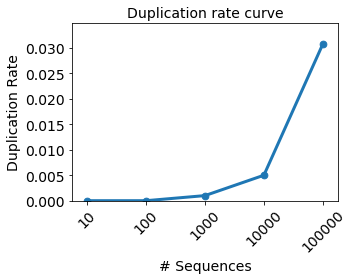

10: 0.0
100: 0.0
1000: 0.0010000000000000009
10000: 0.0050000000000000044
100000: 0.03076000000000001


In [4]:

#Estimate duplication rates

def get_consensus_sequence(pwm) :
    consensus = ''
    
    for j in range(pwm.shape[0]) :
        nt_ix = np.argmax(pwm[j, :])
        
        if nt_ix == 0 :
            consensus += 'A'
        elif nt_ix == 1 :
            consensus += 'C'
        elif nt_ix == 2 :
            consensus += 'G'
        elif nt_ix == 3 :
            consensus += 'T'
    
    return consensus


run_name = "fbgan_apa_simple_sample_median_cutoff"

f = plt.figure(figsize=(5, 4))

n_sequences_list = [10, 100, 1000, 10000, 100000]

ls = []

save_figs = False

dup_rates = []

model = WGAN_LangGP(run_name=run_name)
model.load_model(directory = './checkpoint/' + run_name + '/')

for n_sequences in n_sequences_list :
    n_sequences_ceil = int(n_sequences / model.batch_size) * model.batch_size + model.batch_size

    print("N Sequences = " + str(n_sequences))

    num_batches_sample = int(n_sequences_ceil / model.batch_size)

    print("Starting sampling...")

    seqs = model.sample(num_batches_sample, 1)

    print("Finished sampling.")

    #Sample first n_sequences
    consensus_seqs_kept = seqs[:n_sequences]

    n_unique_seqs_kept = len(np.unique(consensus_seqs_kept))

    print("Number of unique sequences = " + str(n_unique_seqs_kept))

    dup_rate = 1. - n_unique_seqs_kept / n_sequences
    dup_rates.append(dup_rate)

    print("Duplication rate = " + str(round(dup_rate, 4)))


l1 = plt.plot(np.arange(len(n_sequences_list)), dup_rates, linewidth=3, linestyle='-')
plt.scatter(np.arange(len(n_sequences_list)), dup_rates, s=45)

ls.append(l1[0])

plt.xlabel("# Sequences", fontsize=14)
plt.ylabel("Duplication Rate", fontsize=14)
plt.xticks(np.arange(len(n_sequences_list)), n_sequences_list, fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.ylim(0, np.max(dup_rates) * 1.10 + 0.001)

plt.title("Duplication rate curve", fontsize=14)

plt.tight_layout()

if save_figs :
    plt.savefig(model_prefix + "_dup_rate_curve.eps")
    plt.savefig(model_prefix + "_dup_rate_curve.svg")
    plt.savefig(model_prefix + "_dup_rate_curve.png", transparent=True, dpi=150)

plt.show()

for i in range(len(n_sequences_list)) :
    print(str(n_sequences_list[i]) + ": " + str(dup_rates[i]))
